## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the data

In [3]:
cmo = pd.read_csv("../data/CMO_MSP_Mandi.csv")
cmo.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


### Basic dataset description for CMO_MSP
Analysing the basic dataset count and type of data available.
As per the above plot there are 5 columns
- Commodity: What crop are we considering
- Year: Ear in which it is cultivated
- Type: Type of the season/family the crop belongs to
- msprice: Minimum support price  (MSP)
- msp_filter: All the values are one (Don't exactly know what it is). I think it is about the whether the crop needs to considered for MSP or NOT

In [4]:
print("Number of datapoints in the dataset:", cmo.shape[0])
print("Number of commodites in the dataset:", len(cmo["commodity"].unique()))
print("Years of dataset available:", cmo["year"].unique())
print("Type of crops:", cmo["Type"].unique())


Number of datapoints in the dataset: 155
Number of commodites in the dataset: 32
Years of dataset available: [2012 2013 2014 2015 2016]
Type of crops: ['Kharif Crops' 'Rabi Crops' 'Other Crops']


*Observation*

There are total of 155 crops of 32 type of commodities, cultivation distributed across 4 years of data namely 2012-2016. Kharif, Rabi and Other Crops are the type of crops available in the dataset.

In [5]:
cmo.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


*Observation*

From above table we can see that the minimum support price is 170Rs and maximum being 6240Rs and on an average 2822Rs

### Checking the crop price per type

Which type of crop is more profitable?

In [6]:
kfc = cmo[cmo["Type"] == "Kharif Crops"] # Crops that are kharif
rc = cmo[cmo["Type"] == "Rabi Crops"] # Crops that are rabi
oc = cmo[cmo["Type"] == "Other Crops"] # Crops that are others

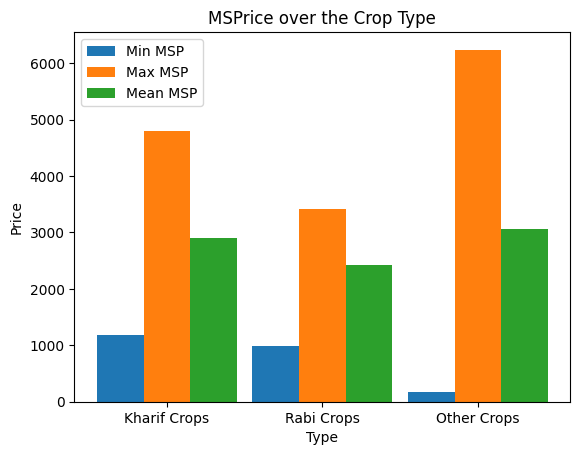

In [7]:
df = pd.DataFrame({
    'Type': list(cmo["Type"].unique()),
    'Min': [kfc.msprice.min(), rc.msprice.min(), oc.msprice.min()],
    'Max': [kfc.msprice.max(), rc.msprice.max(), oc.msprice.max()],
    'Mean': [kfc.msprice.mean(), rc.msprice.mean(), oc.msprice.mean()],
})

X_axis = np.arange(len(df["Type"]))
plt.bar(X_axis - 0.3, df["Min"], 0.3, label = 'Min MSP')
plt.bar(X_axis + 0.0, df["Max"], 0.3, label = 'Max MSP')
plt.bar(X_axis + 0.3, df["Mean"], 0.3, label = 'Mean MSP')
plt.legend()
plt.xticks(X_axis, df["Type"])
plt.title("MSPrice over the Crop Type")
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()


*Observation:*
Other crops has the maximum price and but the has the least MSP. Among the types, Kharif is more profitable with highest minimum, maximum and mean MSP 

### Trend of Average MSP over the year
How is the minimum crop price over the year changed (from 2012-2016)

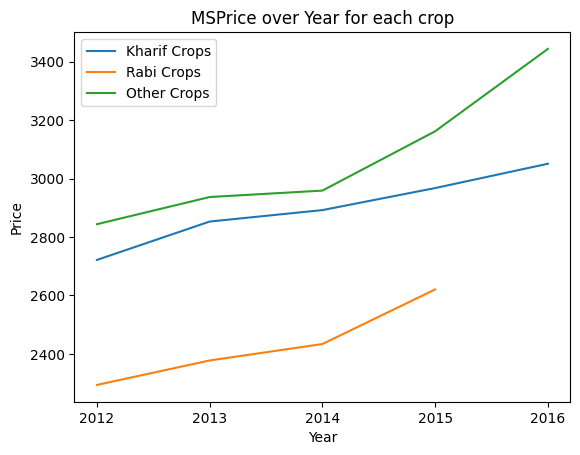

In [8]:
years = list(cmo["year"].unique())
data = {k: [] for k in df["Type"]}
for i in years:
    for k in data.keys():
        data[k].append(cmo[(cmo["Type"] == k) & (cmo["year"] == i)]["msprice"].mean())

for k, v in data.items():
    plt.plot(years, v, label=k)

plt.legend()
plt.xticks(years)
plt.title("MSPrice over Year for each crop")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

*Observation*
Over the year the MSP price of all the crops has been increased and the order has been Other Crops > Kharif > Rabi Crops

### Commodites MSP Pricing Trend
Which crops are more profitable than the other?

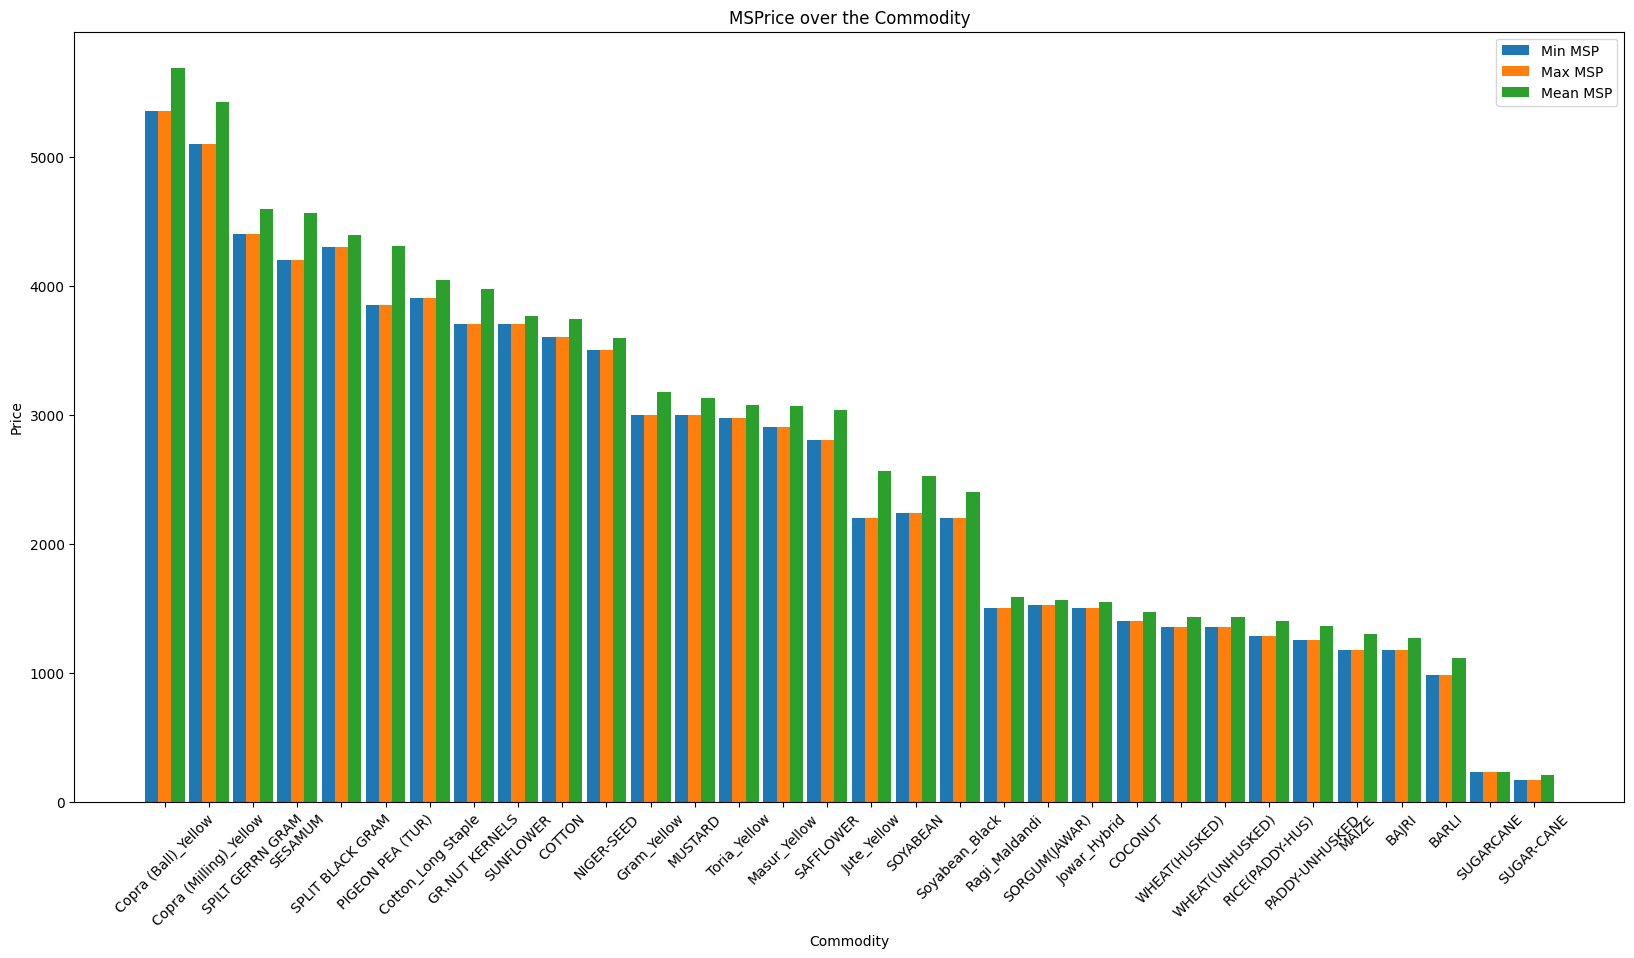

In [9]:
comm = list(cmo["commodity"].unique())
df = pd.DataFrame({
    'commodity': list(cmo["commodity"].unique()),
    'Min': [cmo[(cmo["commodity"] == k)]["msprice"].min() for k in comm],
    'Max': [cmo[(cmo["commodity"] == k)]["msprice"].min() for k in comm] ,
    'Mean': [cmo[(cmo["commodity"] == k)]["msprice"].mean() for k in comm] ,
})

df.sort_values("Mean", inplace=True, ascending=False)

X_axis = np.arange(len(df["commodity"]))
plt.figure(figsize=(20, 10))
plt.bar(X_axis - 0.3, df["Min"], 0.3, label = 'Min MSP')
plt.bar(X_axis + 0.0, df["Max"], 0.3, label = 'Max MSP')
plt.bar(X_axis + 0.3, df["Mean"], 0.3, label = 'Mean MSP')
plt.legend()
plt.xticks(X_axis, df["commodity"], rotation=45)
plt.title("MSPrice over the Commodity")
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.show()

*Observation*

From the above chart we can see which crop/commodity has been more profitable. We see thata Copra (Ball) has remained in the highes place over the years

### Crop commodity MSP pricing over the year for the top 5

Trend for the cop commodity over the year. _Note: You can chaneg the top k by changing the bottom variable_

In [10]:
top_k = 5

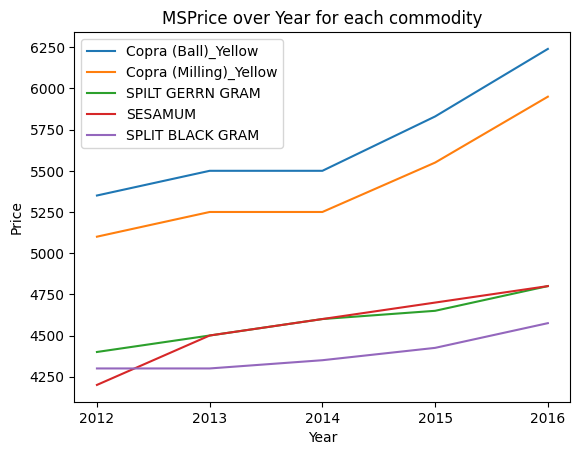

In [11]:
years = list(cmo["year"].unique())
data = {k: [] for k in df["commodity"][:top_k]}
for i in years:
    for k in data.keys():
        data[k].append(cmo[(cmo["commodity"] == k) & (cmo["year"] == i)]["msprice"].mean())

for k, v in data.items():
    plt.plot(years, v, label=k)

plt.legend()
plt.xticks(years)
plt.title("MSPrice over Year for each commodity")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

### Basic dataset description for MONTHLY_DATA_CMO file
Analysing the basic dataset count and type of data available.

In [27]:
monthData = pd.read_csv("../data/Monthly_data_cmo.csv")
monthData.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


As per the above plot there are 11 columns
- APMC: Agriculture Product Management Committee (APMC) under the commodity is sold
- Commodity: Name of the commodity
- Year: Year in which the commodity was sold
- Month: Month in which the commodity was sold
- arrivals_in_qtl: Total weight of the commodity being sold
- min_price: Minimum price of the commodity
- max_price: Maximim price of the commodity
- modal_price: Price at which the product sold (To be predicted by the model later)
- date: Date on which the commodity was sold
- district: Dristrict name
- state_name: State name from which the commodity came

In [28]:
print("Number of datapoints in the dataset:", monthData.shape[0])
print("Number of commodites in the dataset:", len(monthData["Commodity"].unique()))
print("Years of dataset available:", monthData["Year"].unique())
print("Number of Districts:", len(monthData["district_name"].unique()))
print("Number of States:", len(monthData["state_name"].unique()))

Number of datapoints in the dataset: 62429
Number of commodites in the dataset: 352
Years of dataset available: [2015 2016 2014]
Number of Districts: 33
Number of States: 1


*Observation*: Only the data from the Maharastra state spread across 33 districts. There are over 62K datasamples in the dataset. The total number of commodities are 352.
Only the data from the year 2014-16 are available in the file.

### Understanding the correlation of the dataset between each column

As per the time constaint just doing the analysis on subset of dataset say 1000 datasamples

Number of dara samples: 9989


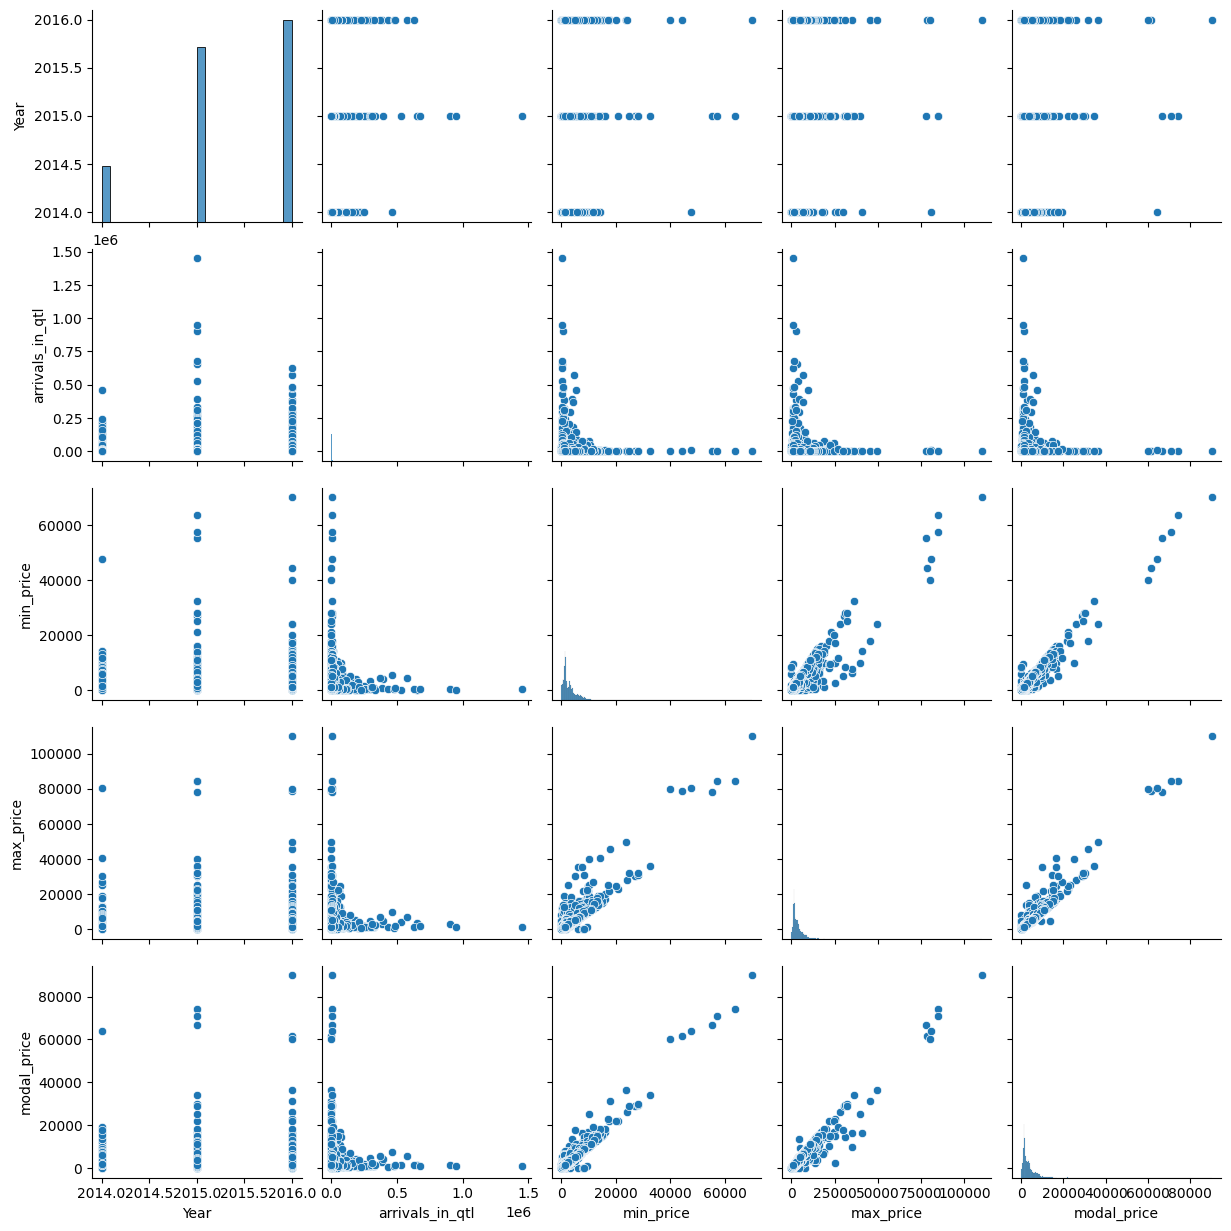

In [29]:
df = monthData.sample(frac=0.16)
print("Number of dara samples:", df.shape[0])
sns.pairplot(df)

### Standardising the values to see the better plot
This also helps in model train better. Larger values (numerical values) can change the model weights significantly and model might not learn better

# Pre-Processing the dataset

Columns to be and their types. (Also mentions the what all columns to keep or delete)

- APMC: Categorical Data; so will be turned into one hot encoded vector
- Commodity: Categorical Data; so will be turned into one hot encoded vector
- Year: Numerical Data; so order of the year will be captured by the model; As the year passes the price increases
- Month: Categorical Data; so will be turned into one hot encoded vector
- arrivals_in_qtl: Numerical Data
- min_price: Minimum price of the commodity [not including in model, model might be biased towards these features]
- max_price: Maximim price of the commodity [not including in model, model might be biased towards these features]
- modal_price: Y Label; It is a numerical Data
- date: Redundant colum as year and month already provided [will be deleted]
- district: Redundant colum as APMC is provided [will be deleted]
- state_name: Redundant colum as APMC is provided [will be deleted]

In [35]:
# Therefore selected columns are 
columns = ["APMC", "Commodity", "Year", "Month", "arrivals_in_qtl", "modal_price"]

In [49]:
# import calendar
# month_to_cat = {month: index for index, month in enumerate(calendar.month_name) if month}


In [36]:
monthData = monthData[columns]

_Note the bottom standardisation is just for visualization not for model training which is done later_

In [37]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    "arrivals_in_qtl": monthData["arrivals_in_qtl"], # Reason for including only these columns are described in cell below preprocessing
    "modal_price": monthData["modal_price"]
})

scaler = StandardScaler()
df = scaler.fit_transform(df)

monthData["arrivals_in_qtl_norm"] = pd.Series(df[:, 0])
monthData["modal_price_norm"] = pd.Series(df[:, 1])


In [38]:
monthData.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,modal_price,arrivals_in_qtl_norm,modal_price_norm
0,Ahmednagar,Bajri,2015,April,79,1463,-0.171861,-0.508072
1,Ahmednagar,Bajri,2016,April,106,1875,-0.171083,-0.393874
2,Ahmednagar,Wheat(Husked),2015,April,1253,1731,-0.138031,-0.433788
3,Ahmednagar,Wheat(Husked),2016,April,387,1999,-0.162985,-0.359504
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1900,-0.063916,-0.386944


Number of dara samples: 9989


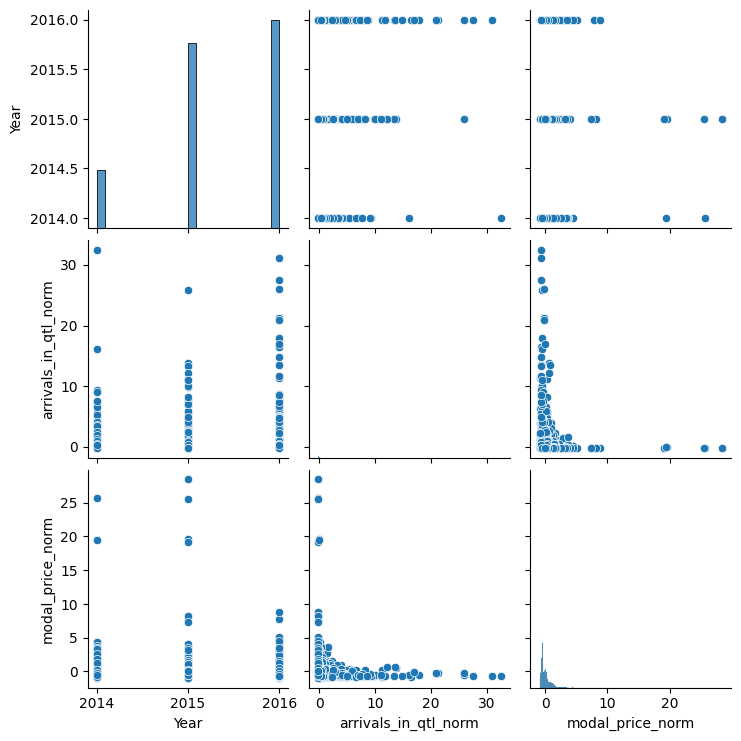

In [40]:
df = monthData.sample(frac=0.16)
df.drop(["arrivals_in_qtl", "modal_price"], axis=1, inplace=True)
print("Number of dara samples:", df.shape[0])
sns.pairplot(df)

*Observation*: We can see that in the EDA, the modal_price depends inversely on the quantity at times (given commodity can change). Also as the year passes by average modal price is avlso increasing (with lesser variance in price)

## Train test split and Standising the data
Train test split in 80-20 ratio and standardising the data on the training set only. This is because we are going to assume the test data is not availale with us and we dont know the distribution. Selection of 80-20 ratio is just as a standard.

In [42]:
monthData = pd.read_csv("../data/Monthly_data_cmo.csv")
monthData = monthData[columns] # Selecting the required columns

In [43]:
monthData.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,modal_price
0,Ahmednagar,Bajri,2015,April,79,1463
1,Ahmednagar,Bajri,2016,April,106,1875
2,Ahmednagar,Wheat(Husked),2015,April,1253,1731
3,Ahmednagar,Wheat(Husked),2016,April,387,1999
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1900


Converting categorical columns to one hot encoded vectors

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(monthData[["APMC", "Commodity", "Month"]]).toarray())

In [52]:
new_data = pd.concat([enc_data, monthData], axis=1)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,APMC,Commodity,Year,Month,arrivals_in_qtl,modal_price
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ahmednagar,Bajri,2015,April,79,1463
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ahmednagar,Bajri,2016,April,106,1875
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ahmednagar,Wheat(Husked),2015,April,1253,1731
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ahmednagar,Wheat(Husked),2016,April,387,1999
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Ahmednagar,Sorgum(Jawar),2015,April,3825,1900


In [55]:
columns_to_keep = list(new_data.columns)
columns_to_keep.remove("APMC")
columns_to_keep.remove("Commodity")
columns_to_keep.remove("Month")

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data[columns_to_keep[:-1]], new_data[columns_to_keep[-1]], test_size=0.2)

print("Train set X and y shape:", X_train.shape, y_train.shape)
print("Test set X and y shape:", X_test.shape, y_test.shape)


Train set X and y shape: (49943, 715) (49943,)
Test set X and y shape: (12486, 715) (12486,)


Train set has 49K samples and test set as 12K samples